In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


## Calculate Magnetic field at position P

In [3]:

def get_B(P):
    R = 0.7
    A = [0.39, 0.4, 0.5]
    P = [0.2, -0.5]
    B = [1,0.5,2]
    G = [0, -2, 0.3]
    
    a = A
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])
    
    # Step 1: check what point it is
    x = P[0]
    y = P[1]

    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
            d = math.sqrt(x**2 + (y-(-R))**2)
            h = R - d

            Bout = float(B[k])+ float(G[k])*h
            break


    return Bout

In [4]:

B = get_B([0.4, -0.3])



## Beam Rigidity

In [5]:
B_e = 3.3356*0.1

In [6]:
B_e

0.33356

## Radius

In [7]:
R = B_e/B
D = [0,1]
R

-0.9977429190736081

## New position

In [8]:
def next_point(r, P, d):
    R = np.array([[0, 1],
            [-1, 0]]) # Defining the rotation matrix in a clockwise direction
    s = 0.001
    d = np.array(d) # The direction of the point
    pc = np.matmul(R, d) # Multiplying the two matrices together to get the vector going from the point to the center

    Cx = P[0]+r*pc[0]
    Cy = P[1]+r*pc[1]
    c = np.array([Cx, Cy])

    CP = np.subtract(P, c) # Subtracting the center from the point to find CP
    theta = s/r

    R = np.array([[np.cos(-theta), -np.sin(-theta)],
            [np.sin(theta), np.cos(-theta)]]) # Defining the rotation matrix in a clockwise direction
    CP2 = np.matmul(R, CP)
    P = np.add(c,CP2) # Adding the distance from the center of the circle with the coordinates of the center to find the coordinates of the new point

    counter_R = np.array([[0, -1],
            [1, 0]]) # Defining the rotation matrix in a counter-clockwise direction
   
    D = np.matmul(counter_R, CP2)

    return P, D

In [9]:
P = [0,0]
D = [1,0]

points = []
for i in range(2):
    B = get_B(P)
    B_e = 3.3356*0.1 # Beam Rigidity
    R = B_e/B # Radius
    P, D = next_point(R,P,D)
    points.append(P)

In [10]:
math.pi*2


6.283185307179586

In [59]:
#R = 0.5
A = [[0, 0.39], [0.39, math.pi+0.01], [math.pi+0.01, math.pi*2]]
#P = [-0.2,0]
#B = [0.6, 0.4, 0.5]
#G = [2.0,  -2.0, 1.0]
B = 3*[0.37]
G = 3*[0]

def get_B(R, A, B, G, P):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]

    # Initialize output
    Bout = 0
    # Update output, if needed

    for k in range(len(A)):
        
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k

            d = math.sqrt(x**2 + (y-(-R))**2)
            h = R - d
            Bout = float(B[k]) + float(G[k])*h
            break

 
    return Bout



def rot_matrix(alpha):
    R = np.array([[np.cos(alpha), -np.sin(alpha)],
        [np.sin(alpha), np.cos(alpha)]]) # Defining the rotation matrix in a clockwise direction
    return R


def next_point(r, P, D):
    
    s = 0.01

   
    pc = np.matmul(rot_matrix(-math.pi/2), D) # Multiplying the two matrices together to get the vector going from the point to the center
    pc = r *pc 

    Cx = P[0]+pc[0]
    Cy = P[1]+pc[1]
    c = np.array([Cx, Cy])
   
    CP = np.subtract(P, c) # Subtracting the center from the point to find CP
    theta = s/r
  
    CP2 = np.matmul(rot_matrix(-theta), CP)
    P2 = np.add(c,CP2) # Adding the distance from the center of the circle with the coordinates of the center to find the coordinates of the new point

    PC2 = -CP2
    D2 = np.matmul(rot_matrix(math.pi/2), PC2)

    # Compute the magnitude of the vector
    magnitude = np.linalg.norm(D2) 
    # Normalize the vector
    D2 = D2/magnitude  

   # D2 = np.array(D2)

    return P2, D2   




def get_points(R, A, B, G, P, D, size):

    # Compute the magnitude of the vector for normalization
    magnitude = np.linalg.norm(D) 
    # Normalize the vector
    eps = 1e-10
    D = D/(magnitude+eps) # Normalizing the vector and adding a tiny constant to avoid division by zero error

    B_e = 3.3356*0.12 # Beam Rigidity
    s = 0.01 # Step size

    points = []
    points.append([float(P[0]), float(P[1])])

    trajectory_len = float(size)
    num_steps = trajectory_len/s

    for i in range(int(num_steps)):
        Bout = get_B(R, A, B, G, P)
        if Bout != 0:
            R = B_e/Bout # Radius
            P, D = next_point(R,P,D) # Calculating the next point
            print(P,Bout)
        else: # If the magnetic field is zero at this point the particle just continues in a straight line
            P2 = s*D
            P = np.add(P, P2)

        points.append(P)
    
    print(len(points))
     
    # Splitting the data into x and y coordinates for plotting
    x = [point[0] for point in points]
    y = [point[1] for point in points]


    return x,y







def default2(A, li, R):
    """ This function creates the default preview that the user can see without having to input X_min, X_max, Y_min, Y_max"""


    # Default values for x_min, x_max, y_min, y_max
    X_min = -0.2
    X_max = R + 0.5
    Y_min = -R-0.2
    Y_max = 0.2
    a = 0 # X coordinate of center of circle
    b = -R # Y coordinate of center of circle
    stepSize = 0.01 # Stepsize of line of circle

    # This is to calculate the coordinates of the circles circumference
    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((R*math.cos(t) + a, R*math.sin(t) + b))
        t += stepSize
    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(y)

    # Initiating the plot
    fig, ax = plt.subplots(figsize=(10,10)) 
    # Adding the line to the plot
    ax.plot(X, Y, color='black')

    # This is to split the Vector into B and G
    d = dict()
    for i in range(len(li[0])):
        d[i] = []
        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)
    B = d[0]
    try:
        G = d[1]
    except KeyError: # If the user only input vector of size one, we just make G a vector of 0's
        G = []
        for i in range(len(li)):
            G.append(0)

    a = A # This is just to not confuse the old alpha with the "new"
    A = []
    curr = 0
    # This part calculates the beginning point and end point of alpha
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])


    # This makes the coordinates of the points and initiates the magnetic field vector
    X = np.linspace(X_min, X_max, num=100)
    Y = np.linspace(Y_min, Y_max, num=100)
    xx, yy = np.meshgrid(X, Y)
    mag_field = np.zeros_like(xx)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            P = xx[i, j], yy[i, j] # Here we define the coordinates of the point
            mag_field[i, j] = get_B(R, A, B, G, P) # Here we calculate the magnetic field at position P

    color_mesh = ax.pcolormesh(xx, yy, mag_field, cmap='Reds') # This line makes the actual plot

    # This is just for customizing the look of the plot
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    colorbar = plt.colorbar(color_mesh, ax=ax)
    colorbar.set_label('Magnetic Field (T)')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([X_min, X_max])
    ax.set_ylim([Y_min, Y_max])
    

    directions = ["0.4, 0", "0.7, 0.2", "0.3, -0.3"]
    positions = ["-0.2, 0.01", "-0.2, -0.01","-0.2, 0"]


   # directions = ["1, 0"]
   # positions = ["-0.2, 0.001"]


 #['-0.2, 0.0', '0.0, 0.0', '0.2, 0.0', '-0.2, 0.0', '0.0, 0.0', '0.2, 0.0', '-0.2, 0.0', '0.0, 0.0', '0.2, 0.0', '-0.2, 0.0', '0.0, 0.0', '0.2, 0.0'] 

    if len(positions) > 11:


        split_positions = [[float(num) for num in pair.split(', ')] for pair in positions]
        split_directions = [[float(num) for num in pair.split(', ')] for pair in directions]

        avg_x_pos = sum(pair[0] for pair in split_positions) / len(split_positions)
        avg_y_pos = sum(pair[1] for pair in split_positions) / len(split_positions)
       
        avg_x_dir = sum(pair[0] for pair in split_directions) / len(split_directions)
        avg_y_dir = sum(pair[1] for pair in split_directions) / len(split_directions)


      #  x,y = get_points(R, A, B, G, [avg_x_pos,avg_y_pos], [avg_x_dir, avg_y_dir], Pages.tracking)   
       # plt.plot(x,y)


    else:

        for i in range(len(positions)):
            parts = positions[i].split(',')
            pos = [float(part) for part in parts]
            
            parts = directions[i].split(',')
            dir = [float(part) for part in parts]

            x,y = get_points(R, A, B, G, [pos[0],pos[1]], [dir[0],dir[1]], 10)   
            plt.plot(x,y)



    return fig,ax  







[0.01999966 0.00992883] 0.5697887428730101
[0.0299973  0.00971537] 0.5693715173636382
[0.03999089 0.00935978] 0.5689609208297399
[0.04997842 0.00886223] 0.5685581812257526
[0.05995788 0.00822291] 0.5681639049497678
[0.06992726 0.00744207] 0.5677786614502334
[0.07988457 0.00651993] 0.5674029788848197
[0.08982781 0.00545679] 0.5670373411339572
[0.099755   0.00425295] 0.5666821853351074
[0.10966416 0.00290873] 0.5663378999665735
[0.11955331 0.00142449] 0.5660048234949645
[ 0.1294205 -0.0001994] 0.5656832435886073
[ 0.13926376 -0.00196253] 0.565373396887732
[ 0.14908114 -0.00386447] 0.565075469311504
[ 0.1588707  -0.00590478] 0.5647895968722273
[ 0.1686305  -0.00808299] 0.5645158669586179
[ 0.17835862 -0.01039858] 0.5642543200430755
[ 0.18805314 -0.01285104] 0.5640049517625403
[ 0.19771216 -0.01543983] 0.5637677153188375
[ 0.20733376 -0.01816438] 0.5635425241423467
[ 0.21691605 -0.02102409] 0.563329254762368
[ 0.22645717 -0.02401834] 0.5631277498284788
[ 0.23595522 -0.0271465 ] 0.562937821

(<Figure size 1000x1000 with 2 Axes>, <Axes: xlabel='X (m)', ylabel='Y (m)'>)

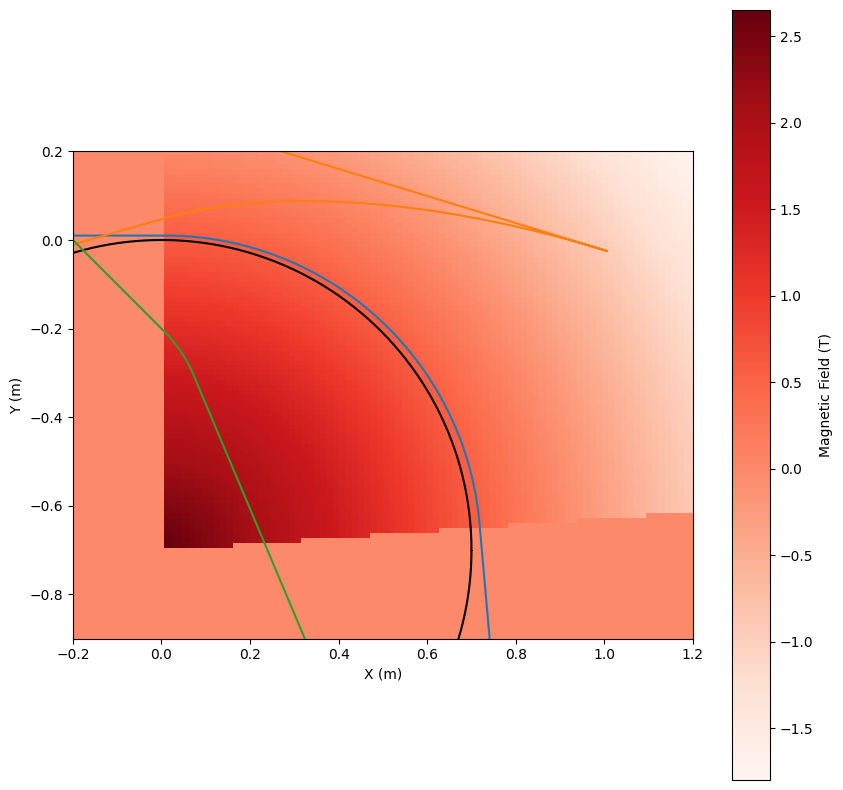

In [60]:


li = [[0.6,3]]
A = [1.5]
R = 0.7

default2(A, li, R)